In [101]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold
from scipy.stats import mstats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [102]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [103]:
train_original = pd.read_csv('./kaggle/input/full-lab-for-labs/train.csv')
test_original = pd.read_csv('./kaggle/input/full-lab-for-labs/test.csv')

In [104]:
# ну тут понятно
test_ids = test_original['ID'] if 'ID' in test_original.columns else test_original.index
print(f"train shape->{train_original.shape}")
print(f"test shape->{test_original.shape}")

train shape->(11017, 35)
test shape->(5000, 35)


In [105]:
display(train_original.head())

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,31.347091


In [106]:
display(test_original.head())

,ID,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,...,0.883232,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650
1,1,2006-04-10,28,64653,674,65491,48,Single,2,Own,...,0.791928,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410
2,2,2013-11-28,41,300000,768,16811,60,Single,1,Own,...,0.805826,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919
3,3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,...,0.829294,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558
4,4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,...,0.735013,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707


In [107]:
train_original.dtypes.value_counts()

,count
float64,29
object,6


In [108]:
display(train_original.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,10487.0,39.850386,1.161413e+01,1.800000e+01,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,10487.0,131587.872127,1.157919e+05,1.500000e+04,20959.500000,89015.000000,257025.000000,7.485080e+05
CreditScore,9986.0,678.082716,1.751925e+02,3.000000e+02,550.000000,722.500000,850.000000,8.500000e+02
LoanAmount,9986.0,29874.218306,2.770551e+04,1.063000e+03,12658.000000,21828.500000,37158.000000,4.189970e+05
LoanDuration,10487.0,53.439878,2.449356e+01,1.200000e+01,36.000000,48.000000,60.000000,1.200000e+02
NumberOfDependents,10487.0,1.568323,1.418684e+00,0.000000e+00,0.000000,1.000000,3.000000,6.000000e+00
MonthlyDebtPayments,9986.0,546.458642,5.019819e+02,1.300000e+01,233.250000,398.000000,685.000000,1.087900e+04
CreditCardUtilizationRate,10487.0,0.284397,1.592405e-01,3.673558e-03,0.158929,0.262229,0.391683,9.146347e-01
NumberOfOpenCreditLines,10487.0,3.033565,1.740186e+00,0.000000e+00,2.000000,3.000000,4.000000,1.200000e+01
NumberOfCreditInquiries,10487.0,0.979498,9.909274e-01,0.000000e+00,0.000000,1.000000,2.000000,6.000000e+00


In [109]:
if 'RiskScore' in train_original.columns:
    display(train_original['RiskScore'].describe())

,RiskScore
count,1.048700e+04
mean,-2.569878e+04
std,1.431675e+06
min,-9.999999e+06
25%,3.256475e+01
50%,4.411876e+01
75%,6.535690e+01
max,1.000000e+07


In [110]:
num_cols_raw = train_original.select_dtypes(include=[np.number]).columns.tolist()

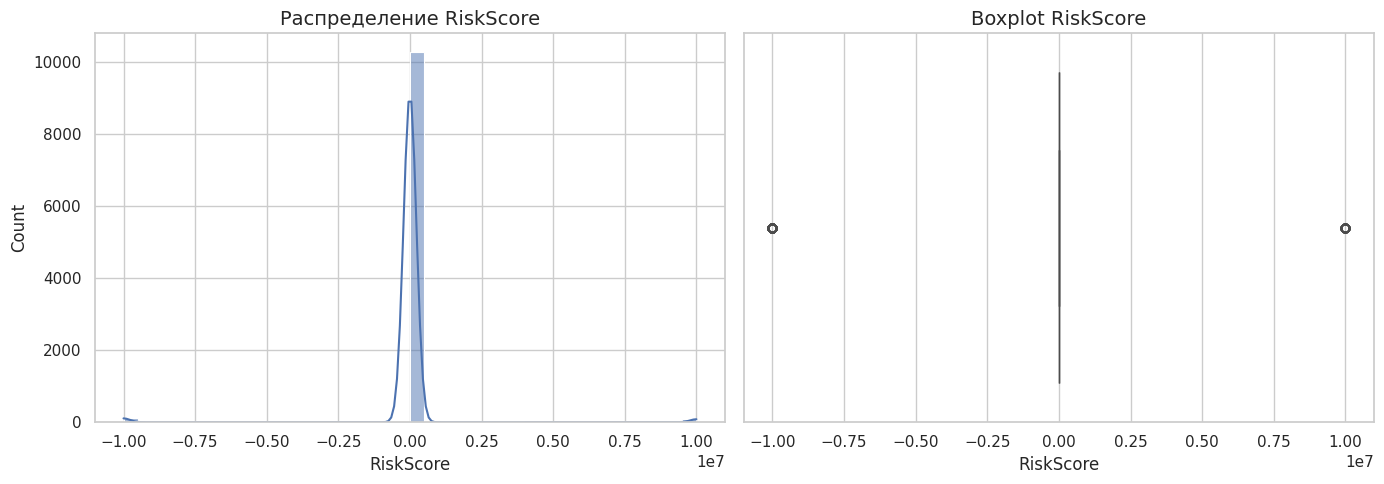

In [111]:
if 'RiskScore' in num_cols_raw:
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(train_original['RiskScore'], bins=40, kde=True, ax=ax[0])
    ax[0].set_title("Распределение RiskScore")
    ax[0].set_xlabel("RiskScore")

    sns.boxplot(x=train_original['RiskScore'], ax=ax[1])
    ax[1].set_title("Boxplot RiskScore")
    ax[1].set_xlabel("RiskScore")

    plt.tight_layout()
    plt.show()

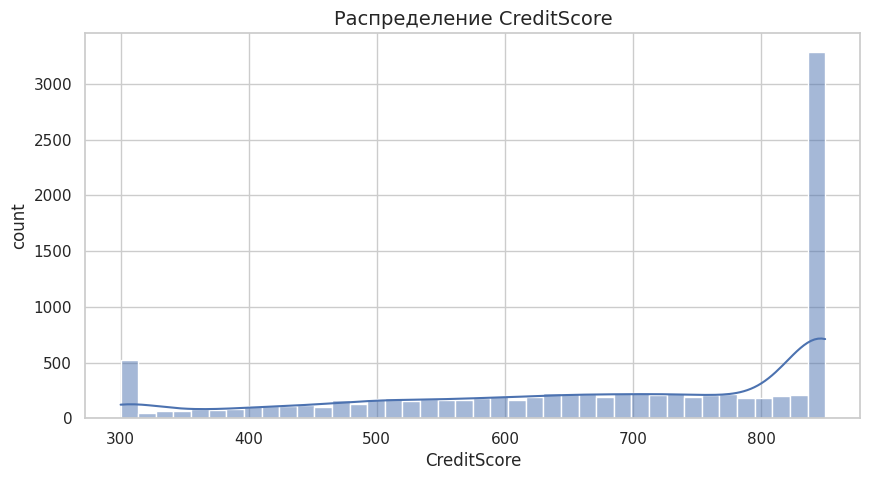

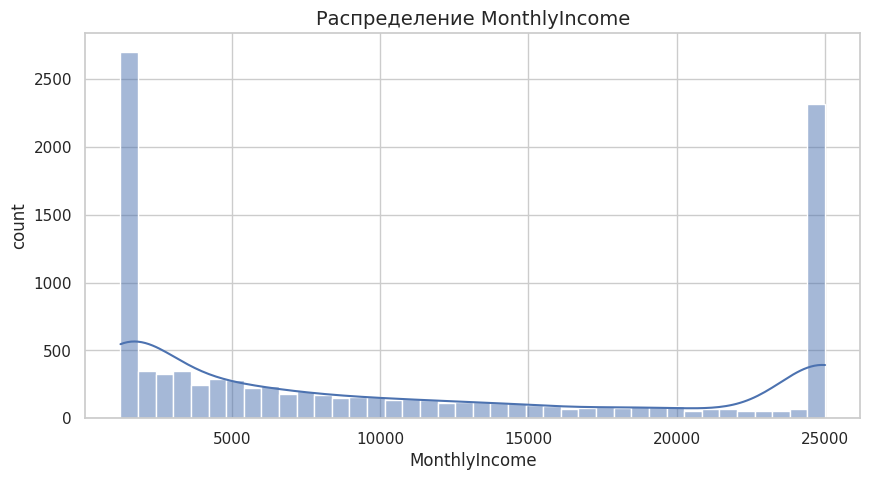

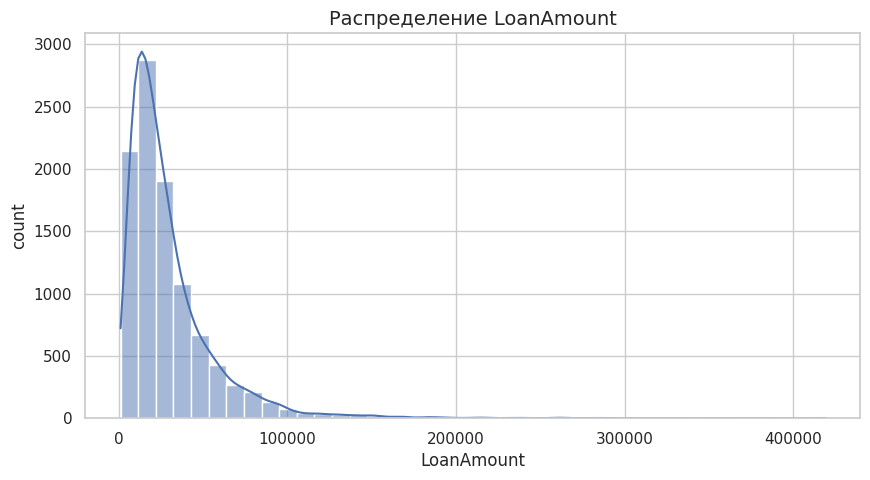

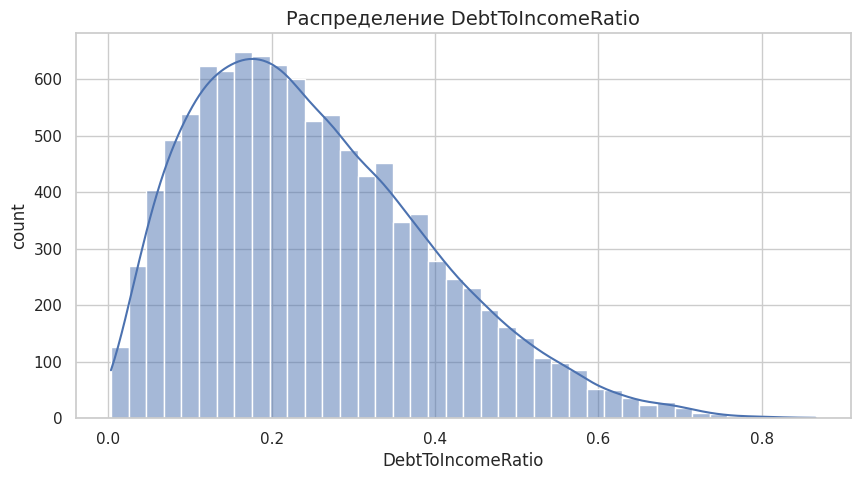

In [112]:
interesting_feats = ['CreditScore', 'MonthlyIncome', 'LoanAmount', 'DebtToIncomeRatio']
for col in interesting_feats:
    if col in num_cols_raw:
        plt.figure()
        sns.histplot(train_original[col], bins=40, kde=True)
        plt.title(f"Распределение {col}")
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()

In [113]:

missing_train = train_original.isnull().mean().sort_values(ascending=False)
missing_test = test_original.isnull().mean().sort_values(ascending=False)

In [114]:
display(missing_train.head(20))

,0
MonthlyDebtPayments,0.093583
LoanAmount,0.093583
CreditScore,0.093583
BaseInterestRate,0.093583
NetWorth,0.093583
TotalAssets,0.093583
BankruptcyHistory,0.093583
LoanPurpose,0.093583
CheckingAccountBalance,0.093583
ApplicationDate,0.048107


In [115]:
display(missing_test.head(20))

,0
ID,0.0
ApplicationDate,0.0
Age,0.0
AnnualIncome,0.0
CreditScore,0.0
LoanAmount,0.0
LoanDuration,0.0
MaritalStatus,0.0
NumberOfDependents,0.0
HomeOwnershipStatus,0.0


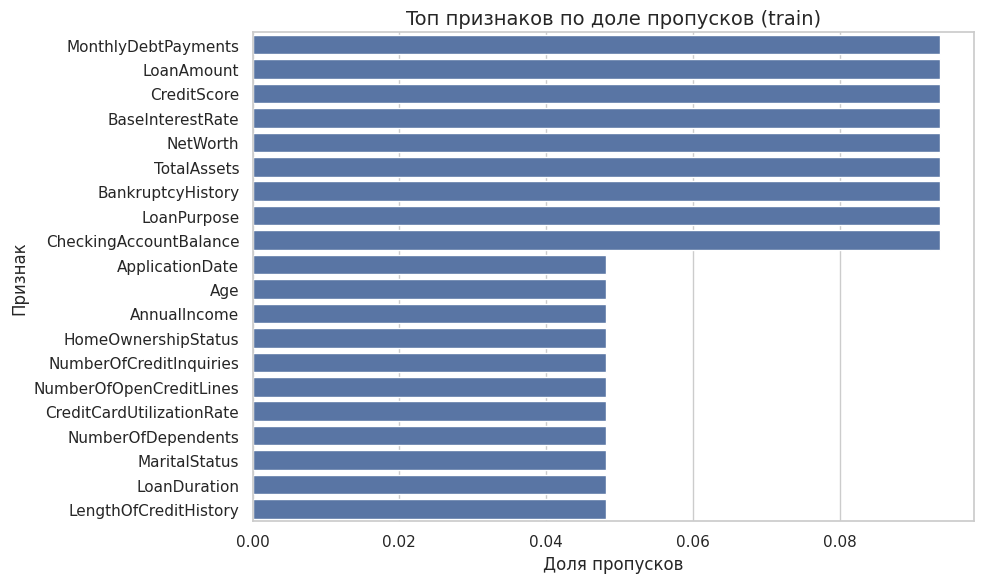

In [116]:
top_miss = missing_train[missing_train > 0].head(20)
if len(top_miss) > 0:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_miss.values, y=top_miss.index)
    plt.title("Toп признаков по доле пропусков (train)")
    plt.xlabel("Доля пропусков")
    plt.ylabel("Признак")
    plt.tight_layout()
    plt.show()

,RiskScore
RiskScore,1.000000
PaymentHistory,0.019144
TotalDebtToIncomeRatio,0.013879
MonthlyLoanPayment,0.012366
LoanAmount,0.011771
NumberOfCreditInquiries,0.011055
NetWorth,0.008804
TotalAssets,0.008092
SavingsAccountBalance,0.007611
CreditCardUtilizationRate,0.005501


,RiskScore
BaseInterestRate,0.002081
NumberOfOpenCreditLines,0.000730
CheckingAccountBalance,-0.000648
MonthlyDebtPayments,-0.001871
LoanDuration,-0.001880
Age,-0.004648
TotalLiabilities,-0.004976
Experience,-0.005408
PreviousLoanDefaults,-0.005409
MonthlyIncome,-0.006145


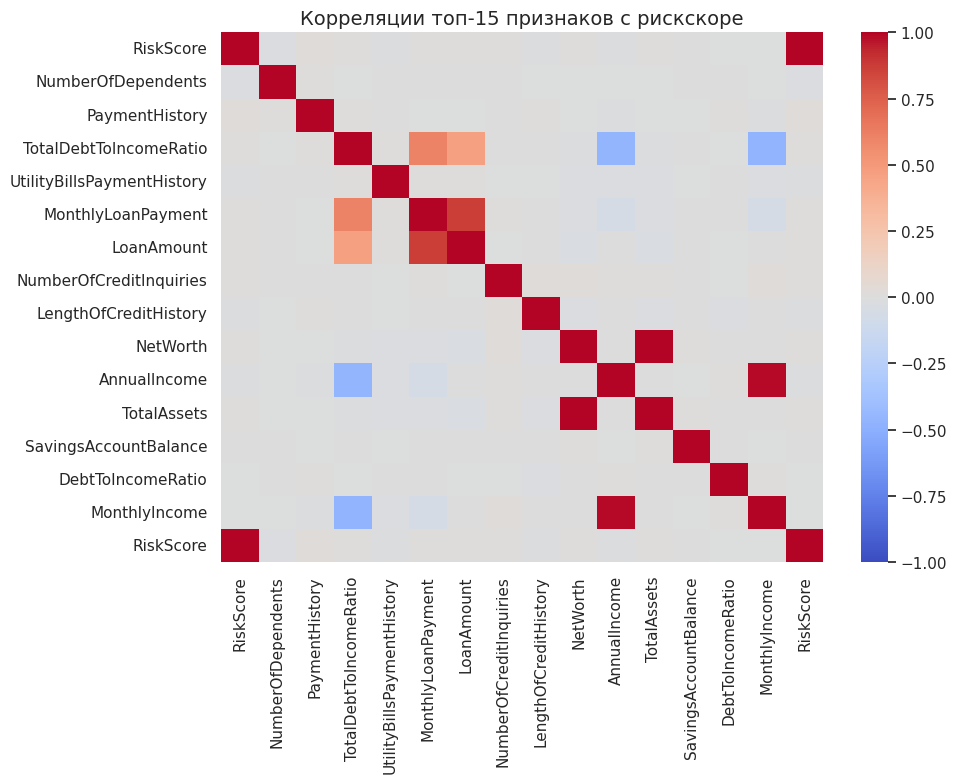

In [117]:

if 'RiskScore' in train_original.columns:
    num_cols_for_corr = train_original.select_dtypes(include=[np.number]).columns.tolist()
    num_cols_for_corr = [c for c in num_cols_for_corr if train_original[c].notnull().sum() > 0]

    corr_matrix = train_original[num_cols_for_corr].corr()
    corr_target = corr_matrix['RiskScore'].sort_values(ascending=False)
    display(corr_target.head(15))
    display(corr_target.tail(15))
    top_corr_feats = corr_target.reindex(
        corr_target.abs().sort_values(ascending=False).head(15).index
    ).index.tolist()

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        train_original[top_corr_feats + ['RiskScore']].corr(),
        annot=False,
        cmap="coolwarm",
        vmin=-1, vmax=1
    )
    plt.title("Корреляции топ-15 признаков с рискскоре")
    plt.tight_layout()
    plt.show()

In [118]:
cat_cols_raw = train_original.select_dtypes(include=['object']).columns.tolist()

In [119]:
cat_cols_raw[:15]

['ApplicationDate',
 'MaritalStatus',
 'HomeOwnershipStatus',
 'LoanPurpose',
 'EmploymentStatus',
 'EducationLevel']

In [120]:
train=train_original.copy()
test= test_original.copy()

# считаем сколько пропусков в строке и выкидываем совсем убитые
train['na_count'] = train.isnull().sum(axis=1)
train = train[train['na_count'] <= 3]
train = train.drop('na_count', axis=1)

In [121]:
# заполняем числовые пропуски медианой по train+test
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    if col not in ['RiskScore', 'ID'] and col in test.columns:
        combined = pd.concat([train[col], test[col]], ignore_index=True)
        global_median = combined.median()
        train[col].fillna(global_median, inplace=True)
        test[col].fillna(global_median, inplace=True)

# оставляем только строки с валидным таргетом
train = train[~train['RiskScore'].isnull()]
valid = (train['RiskScore'] >= 0) & (train['RiskScore'] <= 150)
train = train[valid]

In [122]:
# отбор по IQR, чтобы убрать совсем странные скоры
Q1, Q3 = train['RiskScore'].quantile(0.03), train['RiskScore'].quantile(0.97)
IQR = Q3 - Q1
train = train[(train['RiskScore'] >= max(Q1 - 1.5 * IQR, 0)) & (train['RiskScore'] <= Q3 + 1.5 * IQR)]
print(len(train))

9787


In [123]:
# немного режем выбросы по ключевым финансовым колонкам
outlier_cols = ['LoanAmount', 'TotalAssets', 'TotalLiabilities', 'NetWorth','SavingsAccountBalance', 'CheckingAccountBalance', 'MonthlyDebtPayments']
for col in outlier_cols:
    if col in train.columns:
        train[col] = mstats.winsorize(train[col].fillna(train[col].median()),limits=[0.02, 0.02])
    if col in test.columns:
        test[col] = mstats.winsorize(test[col].fillna(test[col].median()), limits=[0.02, 0.02])
y_train = train['RiskScore'].copy()

# эт удаляем
LEAKS = ['BaseInterestRate', 'InterestRate']

In [124]:

def create_domain_features(df):
    df = df.copy()

    if 'MonthlyDebtPayments' in df.columns and 'MonthlyIncome' in df.columns:
        df['DebtServiceRatio'] = df['MonthlyDebtPayments'] / (df['MonthlyIncome'] + 1)

    if 'MonthlyLoanPayment' in df.columns and 'MonthlyIncome' in df.columns:
        df['PaymentToIncome'] = df['MonthlyLoanPayment'] / (df['MonthlyIncome'] + 1)

    if 'TotalAssets' in df.columns and 'LoanAmount' in df.columns:
        df['AssetCoverageRatio'] = df['TotalAssets'] / (df['LoanAmount'] + 1)

    if 'SavingsAccountBalance' in df.columns and 'MonthlyIncome' in df.columns:
        df['SavingsRate'] = df['SavingsAccountBalance'] / (df['MonthlyIncome'] * 12 + 1)

    if 'NetWorth' in df.columns and 'MonthlyIncome' in df.columns:
        df['NetWorthToIncome'] = df['NetWorth'] / (df['MonthlyIncome'] * 12 + 1)

    if 'CreditCardUtilizationRate' in df.columns and 'NumberOfOpenCreditLines' in df.columns:
        df['CreditUtilScore'] = df['CreditCardUtilizationRate'] * df['NumberOfOpenCreditLines']

    if 'TotalLiabilities' in df.columns and 'TotalAssets' in df.columns:
        df['DebtToAssetRatio'] = df['TotalLiabilities'] / (df['TotalAssets'] + 1)

    if 'LoanDuration' in df.columns and 'Age' in df.columns:
        df['LoanDurationToAge'] = df['LoanDuration'] / (df['Age'] + 1)

    if 'Experience' in df.columns and 'Age' in df.columns:
        df['ExperienceToAge'] = df['Experience'] / (df['Age'] + 1)

    return df

train = create_domain_features(train)
test = create_domain_features(test)

print("Часть с доменами завершена")

Часть с доменами завершена


In [125]:
# Препроцессинг
def prep(df):
    df = df.copy()
    # айдишник нам в модель не нужен
    if 'ID' in df.columns:
        df = df.drop('ID', axis=1)
    # выкидываем лики
    for leak in LEAKS:
        if leak in df.columns:
            df = df.drop(leak, axis=1)
    if 'AnnualIncome' in df.columns and 'MonthlyIncome' in df.columns:
        df = df.drop('AnnualIncome', axis=1)

    # разбираем дату заявки на фичи
    if 'ApplicationDate' in df.columns:
        df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')
        df['AppMonth'] = df['ApplicationDate'].dt.month
        df['AppQuarter'] = df['ApplicationDate'].dt.quarter
        df['AppDaysSinceEpoch'] = (df['ApplicationDate'] - pd.Timestamp('1970-01-01')).dt.days
        df['AppMonth_sin'] = np.sin(2 * np.pi * df['AppMonth']/ 12)
        df['AppMonth_cos'] = np.cos(2 * np.pi* df['AppMonth'] / 12)
        df = df.drop('ApplicationDate', axis = 1)

    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()


    if 'RiskScore' in num_cols:
        num_cols.remove('RiskScore')
    for col in num_cols:
        if df[col].isnull().any():
            df[col].fillna(df[col].median(), inplace=True)

    # заполняем категориальные самым частым
    for col in cat_cols:
        if df[col].isnull().any():
            df[col].fillna(df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unk', inplace=True)

    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    return df

In [126]:
train_p = prep(train)
test_p = prep(test)


X_train = train_p.drop('RiskScore', axis=1) if 'RiskScore' in train_p.columns else train_p
X_test = test_p


all_cols = sorted(set(X_train.columns)|set(X_test.columns))
for col in all_cols:
    if col not in X_train.columns:
        X_train[col] = 0
    if col not in X_test.columns:
        X_test[col] = 0

X_train = X_train[all_cols]
X_test = X_test[all_cols]

print(X_train.shape[1])

55


In [127]:
# джаст чилл наверн, преобразования
if 'TotalDebtToIncomeRatio' in X_train.columns:
    for transform_name, transform_func in [
        ('log', lambda x: np.log1p(x)),
        ('sqrt', lambda x: np.sqrt(x)),
        ('sq', lambda x: x ** 2),
        ('cube', lambda x: x ** 3),
        ('pow_0.5', lambda x: x ** 0.5),
        ('pow_1.5', lambda x: x ** 1.5),
        ('reciprocal', lambda x: 1 / (x + 0.01))
    ]:
        X_train[f'TotalDebt_{transform_name}'] = transform_func(X_train['TotalDebtToIncomeRatio'])
        X_test[f'TotalDebt_{transform_name}'] = transform_func(X_test['TotalDebtToIncomeRatio'])

# взаимодействия между важными признаками
if 'CreditScore' in X_train.columns and 'MonthlyIncome' in X_train.columns:
    X_train['Credit_X_Income'] = X_train['CreditScore'] * X_train['MonthlyIncome']
    X_test['Credit_X_Income'] = X_test['CreditScore'] * X_test['MonthlyIncome']
    X_train['Credit_X_Income_log'] = np.log1p(X_train['Credit_X_Income'])
    X_test['Credit_X_Income_log'] = np.log1p(X_test['Credit_X_Income'])

if 'CreditScore' in X_train.columns and 'TotalDebtToIncomeRatio' in X_train.columns:
    X_train['Credit_X_TotalDebt'] = X_train['CreditScore'] * X_train['TotalDebtToIncomeRatio']
    X_test['Credit_X_TotalDebt'] = X_test['CreditScore'] * X_test['TotalDebtToIncomeRatio']

if ('MonthlyIncome' in X_train.columns and 'CreditScore' in X_train.columns and 'TotalDebtToIncomeRatio' in X_train.columns):
    X_train['Triple_Interaction'] =(
        X_train['MonthlyIncome'] *
        X_train['CreditScore'] *
        X_train['TotalDebtToIncomeRatio'] / 1e9
    )
    X_test['Triple_Interaction']=(
        X_test['MonthlyIncome'] *
        X_test['CreditScore'] *
        X_test['TotalDebtToIncomeRatio'] / 1e9
    )



In [128]:
def fe(X):
    X = X.copy()
    for col in ['CreditScore', 'MonthlyIncome', 'LoanAmount', 'DebtToIncomeRatio', 'Age', 'TotalAssets']:
        if col in X.columns:
            X[f'{col}_log'] = np.log1p(X[col].clip(lower=0))
            X[f'{col}_sqrt'] = np.sqrt(X[col].clip(lower=0))
            X[f'{col}_sq'] = X[col] ** 2
    for col in ['CreditScore', 'MonthlyIncome']:
        if col in X.columns:
            X[f'{col}_cube'] = X[col] ** 3
    return X

In [129]:
X_train = fe(X_train)
X_test = fe(X_test)
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

for col in X_train.columns:
    if X_train[col].isnull().any():
        med = X_train[col].median()
        X_train[col].fillna(med, inplace=True)
        X_test[col].fillna(med, inplace=True)

In [130]:
X_train.shape[1]

86

In [131]:
TOP3 = ['CreditScore', 'MonthlyIncome', 'TotalDebtToIncomeRatio']
X_top3_tr = X_train[[c for c in TOP3 if c in X_train.columns]]
X_top3_te = X_test[[c for c in TOP3 if c in X_test.columns]]

poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3_tr = poly3.fit_transform(X_top3_tr)
X_poly3_te = poly3.transform(X_top3_te)

In [132]:
MID6 = ['DebtToIncomeRatio', 'LoanAmount', 'Age', 'MonthlyLoanPayment', 'TotalAssets', 'LengthOfCreditHistory']
X_mid6_tr = X_train[[c for c in MID6 if c in X_train.columns]]
X_mid6_te = X_test[[c for c in MID6 if c in X_test.columns]]
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2_tr = poly2.fit_transform(X_mid6_tr)
X_poly2_te = poly2.transform(X_mid6_te)

In [133]:
X_mid6_tr.shape[1]

6

In [134]:
X_poly2_tr.shape[1]

27

In [135]:
all_processed = TOP3 + MID6
X_rest_tr = X_train[[c for c in X_train.columns if c not in all_processed]].values
X_rest_te = X_test[[c for c in X_test.columns if c not in all_processed]].values
X_full_tr = np.hstack([X_poly3_tr, X_poly2_tr, X_rest_tr])
X_full_te = np.hstack([X_poly3_te, X_poly2_te, X_rest_te])

In [136]:
X_full_tr.shape[1]

123

In [137]:
scaler = RobustScaler()
X_scaled_tr = scaler.fit_transform(X_full_tr)
X_scaled_te = scaler.transform(X_full_te)


alphas_to_test = [0.0001, 0.00025, 0.0005, 0.00075, 0.001]
kf = KFold(n_splits=5, shuffle=True, random_state=42)


best_alpha = None
best_cv_score = float('inf')

In [138]:
for alpha in alphas_to_test:
    cv_scores = []

    for train_idx, val_idx in kf.split(X_scaled_tr):
        X_tr_fold, X_val_fold = X_scaled_tr[train_idx], X_scaled_tr[val_idx]
        y_tr_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = Ridge(alpha=alpha)
        model.fit(X_tr_fold, y_tr_fold)
        pred_val = model.predict(X_val_fold)
        mse_val = mean_squared_error(y_val_fold, pred_val)
        cv_scores.append(mse_val)

    avg_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    marker = "🔥" if avg_cv_score < best_cv_score else ""
    print(f"alpha={alpha:8.5f}:CV_MSE = {avg_cv_score:.4f} ± {std_cv_score:.4f} {marker}")

    if avg_cv_score < best_cv_score:
        best_cv_score = avg_cv_score
        best_alpha = alpha

alpha= 0.00010:CV_MSE = 25.8191 ± 0.8302 🔥
alpha= 0.00025:CV_MSE = 25.8248 ± 0.8169 
alpha= 0.00050:CV_MSE = 25.8407 ± 0.7982 
alpha= 0.00075:CV_MSE = 25.8627 ± 0.7831 
alpha= 0.00100:CV_MSE = 25.8884 ± 0.7706 


In [139]:
model_final = Ridge(alpha=best_alpha)
model_final.fit(X_scaled_tr, y_train)

pred_train = model_final.predict(X_scaled_tr)
pred_test = model_final.predict(X_scaled_te)

train_mse = mean_squared_error(y_train, pred_train)
train_r2 = r2_score(y_train, pred_train)
train_mae = mean_absolute_error(y_train, pred_train)

In [140]:
print(train_mse,train_r2,train_mae)

25.187283523635053 0.915404752058846 3.8032032570760155


In [141]:
residuals = y_train - pred_train
abs_residuals = np.abs(residuals)

high_error_threshold = abs_residuals.quantile(0.95)
high_error_mask = abs_residuals > high_error_threshold

In [142]:
high_error_mask.sum()

np.int64(490)

In [143]:
high_error_threshold

np.float64(10.438681111641815)

In [144]:
if high_error_mask.sum() > 0:
    problem_risks = y_train[high_error_mask]

In [145]:
problem_risks.mean()

np.float64(48.91579052929917)

In [146]:
print("lol",problem_risks.min(),problem_risks.max())

lol 21.012227202457986 89.46284783051142


In [147]:
y_final = np.clip(pred_test, 0, 120)
submission = pd.DataFrame({
    'ID': test_ids,
    'RiskScore': y_final
})

submission.to_csv('submission.csv', index=False)

In [148]:
# итог
print(X_full_tr.shape[1],
best_alpha,
train_mse,
train_r2,
max(train_mse - 0.70, 22),
)

123 0.0001 25.187283523635053 0.915404752058846 24.487283523635053


In [149]:
# CHILL на KAGGLE <25 :)))